In [47]:
import numpy as np
import matplotlib.pylab as pltlab
import tensorflow as tf
import matplotlib.pyplot as plt

In [48]:
#QUESTION 1
def show(name, n, m, i, Title):
    plt.subplot(n, m , i)
    plt.imshow(name, cmap='gray')
    plt.title(Title)
    plt.axis('Off')

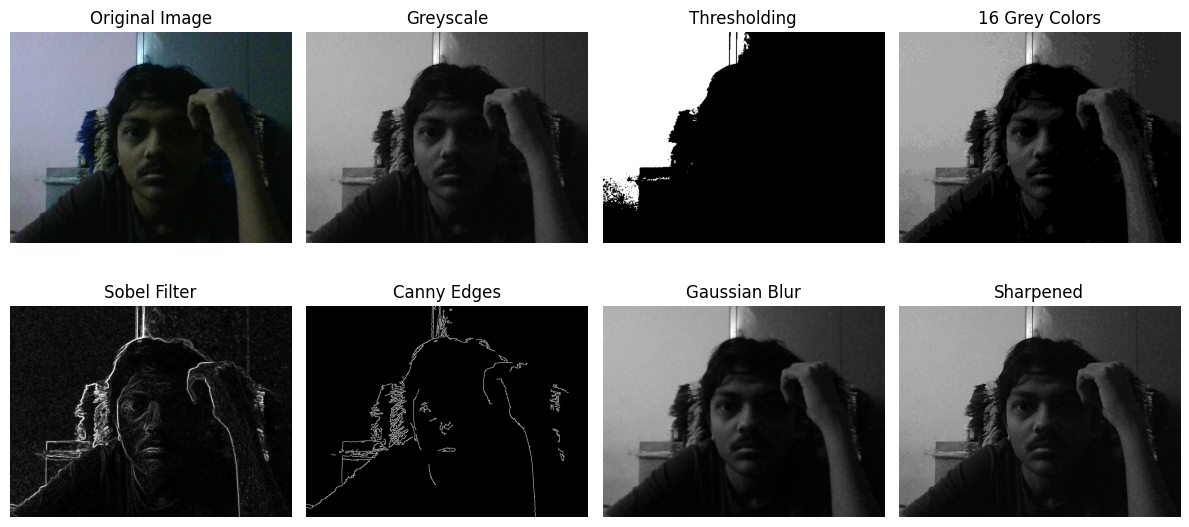

In [49]:
#QUESTION 2
import cv2

# Function to capture an image
def capture_image(camera_index=0):
    cap = cv2.VideoCapture(camera_index)
    if not cap.isOpened():
        print(f"Error: Camera {camera_index} not available. Try a different index.")
        return None
    ret, frame = cap.read()
    cap.release()
    if ret:
        return frame
    else:
        print("Error: Could not capture image.")
        return None

# Function for greyscaling
def grey_scale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Function for thresholding
def threshold_image(image, threshold=128):
    _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return binary_image

# Function for 16 division grey colors
def reduce_greyscale_levels(image, levels=16):
    factor = 256 // levels
    return (image // factor) * factor

# Function for Sobel filter
def apply_sobel(image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # X direction
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Y direction
    sobel = cv2.magnitude(sobelx, sobely)
    return cv2.convertScaleAbs(sobel)

# Function for Canny edge detection
def apply_canny(image, low_threshold=50, high_threshold=150):
    return cv2.Canny(image, low_threshold, high_threshold)

# Function to apply Gaussian filter
def apply_gaussian_filter(image):
    kernel = cv2.getGaussianKernel(ksize=5, sigma=1)
    gaussian_kernel = np.outer(kernel, kernel)
    return cv2.filter2D(image, -1, gaussian_kernel)

# Function to sharpen the image
def sharpen_image(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

# Function to convert RGB to BGR
def convert_rgb_to_bgr(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Main code
captured_image = capture_image(0)  # Change index to 1 or more if needed
if captured_image is not None:
    gray_image = grey_scale(captured_image)
    thresholded_image = threshold_image(gray_image)
    reduced_grey_image = reduce_greyscale_levels(gray_image)
    sobel_image = apply_sobel(gray_image)
    canny_image = apply_canny(gray_image)
    blurred_image = apply_gaussian_filter(gray_image)
    sharpened_image = sharpen_image(blurred_image)
    bgr_image = convert_rgb_to_bgr(captured_image)

    # Plot results in a 2x4 grid
    titles = [
        "Original Image", "Greyscale", "Thresholding", "16 Grey Colors",
        "Sobel Filter", "Canny Edges", "Gaussian Blur", "Sharpened"
    ]
    images = [
        captured_image, gray_image, thresholded_image, reduced_grey_image,
        sobel_image, canny_image, blurred_image, sharpened_image
    ]

    pltlab.figure(figsize=(12, 6))
    for i in range(8):
        pltlab.subplot(2, 4, i+1)
        if len(images[i].shape) == 2:  # Greyscale images
            plt.imshow(images[i], cmap='gray')
        else:  # Color images
            pltlab.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        pltlab.title(titles[i])
        pltlab.axis("off")
    pltlab.tight_layout()
    pltlab.show()


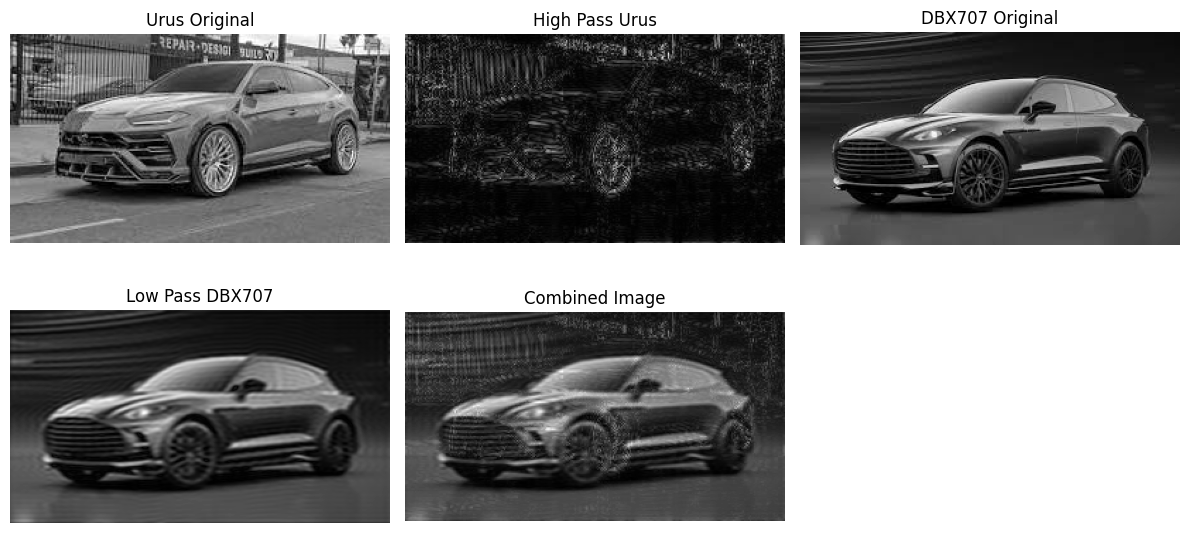

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to show images in a grid using matplotlib
def show(name, n, m, i, Title):
    plt.subplot(n, m, i)
    plt.imshow(name, cmap='gray')
    plt.title(Title)
    plt.axis('off')

# Function to apply a high-pass filter
def apply_high_pass_filter(image):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.uint8)
    radius = min(rows, cols) // 4
    mask[crow - radius:crow + radius, ccol - radius:ccol + radius] = 0
    filtered_shift = dft_shift * mask
    filtered_dft = np.fft.ifftshift(filtered_shift)
    high_pass_image = np.abs(np.fft.ifft2(filtered_dft))
    return high_pass_image

# Function to apply a low-pass filter
def apply_low_pass_filter(image):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    radius = min(rows, cols) // 4
    mask[crow - radius:crow + radius, ccol - radius:ccol + radius] = 1
    filtered_shift = dft_shift * mask
    filtered_dft = np.fft.ifftshift(filtered_shift)
    low_pass_image = np.abs(np.fft.ifft2(filtered_dft))
    return low_pass_image

# Function to combine the images
def combine_images(high_pass_image, low_pass_image):
    # Resize both images to the same size if they are different
    if high_pass_image.shape != low_pass_image.shape:
        low_pass_image = cv2.resize(low_pass_image, (high_pass_image.shape[1], high_pass_image.shape[0]))
    
    # Combine the images using addWeighted
    combined_image = cv2.addWeighted(high_pass_image, 0.5, low_pass_image, 0.5, 0)
    return combined_image

# Load the images (replace these with your actual image paths)
green_urus = cv2.imread('green urus.jpeg', cv2.IMREAD_GRAYSCALE)
green_dbx707 = cv2.imread('green dbx707.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply the filters
high_pass_urus = apply_high_pass_filter(green_urus)
low_pass_dbx707 = apply_low_pass_filter(green_dbx707)

# Combine the images
final_combined_image = combine_images(high_pass_urus, low_pass_dbx707)

# Display the images using the show() function in a 2x3 grid
plt.figure(figsize=(12, 6))

show(green_urus, 2, 3, 1, "Urus Original")
show(high_pass_urus, 2, 3, 2, "High Pass Urus")
show(green_dbx707, 2, 3, 3, "DBX707 Original")
show(low_pass_dbx707, 2, 3, 4, "Low Pass DBX707")
show(final_combined_image, 2, 3, 5, "Combined Image")

plt.tight_layout()
plt.show()


In [59]:
#QUESTION 4

print("YES I HAVE SEEN THE GIT REPO COLAB NOTEBOOK, no doubts, all clr")

YES I HAVE SEEN THE GIT REPO COLAB NOTEBOOK, no doubts, all clr


In [60]:
#QUESTION 5

print("I HAVE DONE TILL Question 4 and not Q5 because I was not able to do the assignment in time due to medical reasons, but i will do the question after the deadline and i request that if it is possible then accept question 5 later.")

I HAVE DONE TILL Question 4 and not Q5 because I was not able to do the assignment in time due to medical reasons, but i will do the question after the deadline and i request that if it is possible then accept question 5 later.
